In [3]:
# Import the libaries 
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
# Load the data 
#define the ticker symbol
tickerSymbol = 'MSFT'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2020-1-1', end='2020-6-9')

#period: the frequency at which to gather the data; common options would include ‘1d’ (daily), ‘1mo’ (monthly), ‘1y’ (yearly)
#start: the date to start gathering the data. For example ‘2010–1–1’
#end: the date to end gathering the data. For example ‘2020–1–25’

#see your data
tickerDf.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,157.91,159.85,157.46,159.74,22622100,0.0,0
2020-01-03,157.45,159.07,157.19,157.75,21116200,0.0,0
2020-01-06,156.22,158.23,155.65,158.16,20813700,0.0,0
2020-01-07,158.44,158.79,156.46,156.71,21634100,0.0,0


In [10]:
# Dont need to do this but a good reference. If you want to change the index to
# to a different set of values use 
df = tickerDf
df.set_index(df['Open'].values).head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
157.91,157.91,159.85,157.46,159.74,22622100,0.0,0
157.45,157.45,159.07,157.19,157.75,21116200,0.0,0
156.22,156.22,158.23,155.65,158.16,20813700,0.0,0


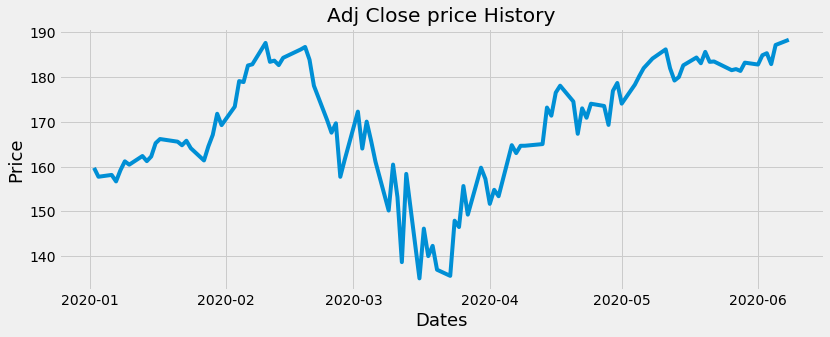

In [13]:
# Visually show thr price
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index,df['Close'], label = 'Adjusted Close Price' )
plt.title('Adj Close price History')
plt.xlabel('Dates',fontsize = 18)
plt.ylabel('Price',fontsize= 18)
plt.show()

In [16]:
# Prepare the data to calculate the RSI 

# Get the difference in price 
#                  diff(1)=Get the difference in price from the previous day 
delta = df['Close'].diff(1)
delta

Date
2020-01-02     NaN
2020-01-03   -1.99
2020-01-06    0.41
2020-01-07   -1.45
2020-01-08    2.50
              ... 
2020-06-02    2.08
2020-06-03    0.45
2020-06-04   -2.44
2020-06-05    4.28
2020-06-08    1.16
Name: Close, Length: 109, dtype: float64

In [17]:
# Get rid of NaN
delta = delta.dropna()
delta

Date
2020-01-03   -1.99
2020-01-06    0.41
2020-01-07   -1.45
2020-01-08    2.50
2020-01-09    1.99
              ... 
2020-06-02    2.08
2020-06-03    0.45
2020-06-04   -2.44
2020-06-05    4.28
2020-06-08    1.16
Name: Close, Length: 108, dtype: float64

In [18]:
# Get the postive gains (up) and the negative gains (down)
up = delta.copy()
down = delta.copy()

# Get only the positive values in up 
# for any values in up less then zero, set them equal to zero
up[up < 0] = 0
down[down > 0] = 0

In [22]:
# Get the time period 
period = 14
# Calculate the average gain and the average loss
AVG_Gain = up.rolling(window = period).mean()
AVG_Loss = abs(down.rolling(window = period).mean())

In [23]:
# Calculate the RSI

# Calculate the Relative Strength (RS)
RS = AVG_Gain / AVG_Loss
# Calculate the Relative Strength Index (RSI)
RSI = 100.0 - (100.0 / (1.0 + RS))

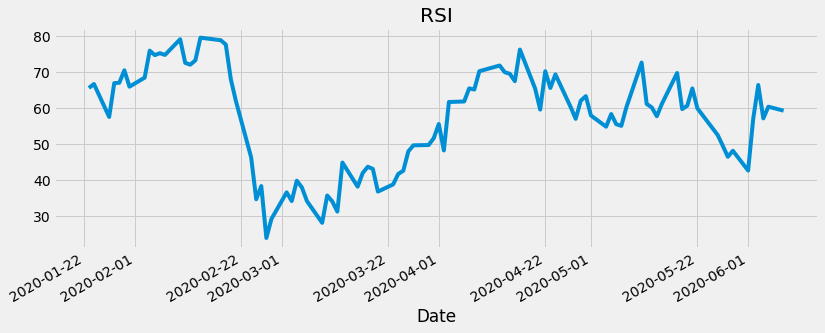

In [25]:
# Show the RSI Visually 
plt.figure(figsize=(12.2,4.5))
RSI.plot()
plt.title('RSI')
plt.show()

In [27]:
# Put it all together

# Create a new data frame
new_df = pd.DataFrame()
new_df['Close'] = df['Close']
new_df['RSI'] =RSI
new_df.head(4)

,Close,RSI
Date,,
2020-01-02,159.74,NaN
2020-01-03,157.75,NaN
2020-01-06,158.16,NaN
2020-01-07,156.71,NaN


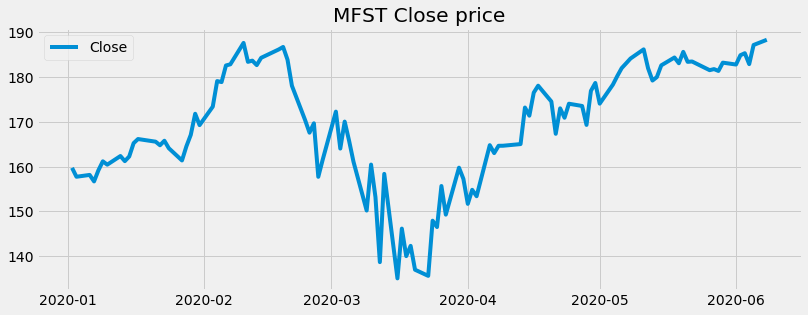

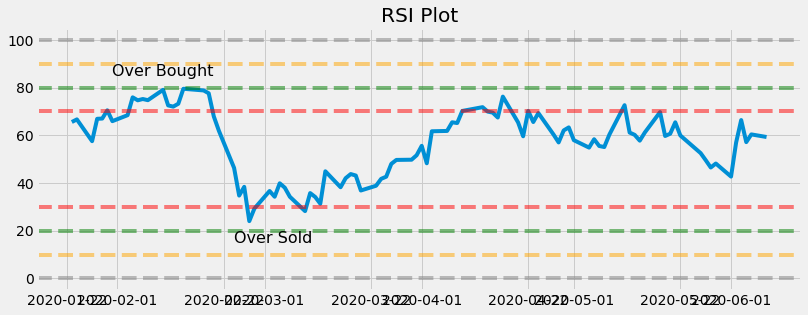

In [65]:
# Visually show the close price and RSI 

# Plot the close price 
plt.figure(figsize=(12.2,4.5))
plt.plot(new_df.index, new_df['Close'])
plt.title('MFST Close price')
plt.legend(new_df.columns.values, loc = 'upper left')
plt.show()

# plot the corresponding RSI values and the significant levels
plt.figure(figsize=(12.2,4.5))
plt.title('RSI Plot')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(0, linestyle = '--', alpha = 0.5, color = 'gray')
plt.axhline(10, linestyle = '--', alpha = 0.5, color = 'orange')
plt.axhline(20, linestyle = '--', alpha = 0.5, color = 'green')
plt.axhline(30, linestyle = '--', alpha = 0.5, color = 'red')
plt.axhline(70, linestyle = '--', alpha = 0.5, color = 'red')
plt.axhline(80, linestyle = '--', alpha = 0.5, color = 'green')
plt.axhline(90, linestyle = '--', alpha = 0.5, color = 'orange')
plt.axhline(100, linestyle = '--', alpha = 0.5, color = 'gray')
plt.text(new_df.index[20], 85, 'Over Bought', fontsize=16)
plt.text(new_df.index[35],15, 'Over Sold', fontsize=16)
plt.show()